**Capstone 2: EDA**

Problem Statement: The National Transportation Safety Board (NTSB) has an Aviation Accident Database that contains information about civil aviation accidents and incidents that they investigate within the United States, its territories and international waters. For this Project, we will specifically be looking at airplane accidents for the 20 years from 2002 to 2021. The operations included are scheduled Part 121: Air Carrier, which includes most passenger airlines, as well as Part 135: Small Carrier for both commuter and ‘air taxi’ small aircraft. This dataset does not include aircraft accidents where the aircraft involved was amateur built.

Objectives of this notebook: 

**Data Exploration**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_excel('data/flights_cleaned.xlsx')
df.head()

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,MinorInjuryCount,ProbableCause,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6
0,ANC08MA038,ACC,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,Aviation,...,1.0,The failure of company maintenance personnel t...,135,Personnel issues - Task performance - Mainten...,Aircraft,Aircraft structures,Doors,Cargo/baggage doors,Incorrect service/maintenance,NaN
1,CHI08LA071,ACC,67425,2008-01-09T07:49:00Z,Detroit,Michigan,United States,N349NB,False,Aviation,...,0.0,The separation of the engine cowling which res...,121,Aircraft - Aircraft power plant - Power plant...,Personnel issues,Psychological,Attention/monitoring,Attention,Maintenance personnel,NaN
2,SEA08LA061,ACC,67369,2008-01-13T19:29:00Z,San Francisco,California,United States,"N705SK, N508UA",False,Aviation,...,0.0,The company tug operator of the other airplane...,121,Environmental issues - Physical environment -...,Environmental issues,Conditions/weather/phenomena,Light condition,Dark,Not specified,NaN
3,SEA08FA062,ACC,67390,2008-01-14T05:08:00Z,Lihue,Hawaii,United States,N410UB,False,Aviation,...,0.0,The pilot's spatial disorientation and loss of...,135,Environmental issues - Task environment - Pre...,Personnel issues,Psychological,Perception/orientation/illusion,Spatial disorientation,Pilot,NaN
4,ANC08LA031,ACC,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,Aviation,...,1.0,The pilot's selection of unsuitable terrain fo...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,NaN


In [4]:
df.shape

(753, 24)

In [5]:
df.columns

Index(['NtsbNo', 'EventType', 'Mkey', 'EventDate', 'City', 'State', 'Country',
       'N#', 'HasSafetyRec', 'Mode', 'OriginalPublishedDate',
       'HighestInjuryLevel', 'FatalInjuryCount', 'SeriousInjuryCount',
       'MinorInjuryCount', 'ProbableCause', 'FAR Part', 'Findings_supp',
       'Findings_main1', 'Findings_main2', 'Findings_main3', 'Findings_main4',
       'Findings_main5', 'Findings_main6'],
      dtype='object')

**Looking into Accident Cuases**

Looked at the distributions in the previous notebook, but want to look at them here as well. Specifically for the accident causes and then injuries. Will then look at how these two relate.

In [6]:
#look at the main causes
df.Findings_main1.unique()

array(['Aircraft ', 'Personnel issues ', 'Environmental issues ',
       'Not determined ', 'Organizational issues '], dtype=object)

([0, 1, 2, 3, 4],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

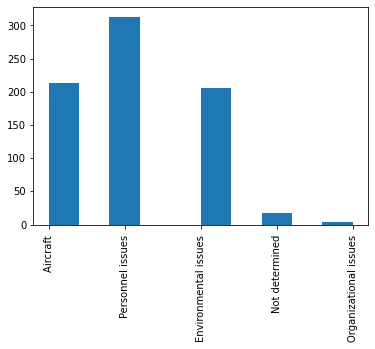

In [7]:
#plot them for visual
plt.hist(df['Findings_main1'])
plt.xticks(rotation = 90)

In [8]:
#get counts
df.Findings_main1.value_counts()

Personnel issues          312
Aircraft                  214
Environmental issues      206
Not determined             17
Organizational issues       4
Name: Findings_main1, dtype: int64

Looks like Personnel issues are the main cause of aircraft accidents, followed by Aircraft and Environmental issues.

Want to look at how injuries relate to accident cause type. But first looking at counts of different injuries.

In [9]:
print(df.MinorInjuryCount.value_counts())
print(df.MinorInjuryCount.sum())

0.0      592
1.0       71
2.0       26
3.0       19
4.0       19
5.0        4
7.0        4
9.0        3
10.0       2
8.0        2
6.0        2
25.0       1
41.0       1
12.0       1
21.0       1
11.0       1
20.0       1
125.0      1
22.0       1
Name: MinorInjuryCount, dtype: int64
656.0


In [10]:
print(df.SeriousInjuryCount.value_counts())
print(df.SeriousInjuryCount.sum())

0.0    507
1.0    209
2.0     18
3.0      6
4.0      4
6.0      3
5.0      3
8.0      1
9.0      1
Name: SeriousInjuryCount, dtype: int64
329.0


In [11]:
print(df.FatalInjuryCount.value_counts())
print(df.FatalInjuryCount.sum())

0.0     672
1.0      36
2.0      14
3.0      11
4.0       8
9.0       3
5.0       3
6.0       2
8.0       1
50.0      1
10.0      1
Name: FatalInjuryCount, dtype: int64
251.0


In [12]:
#create a dataframe that has sum of each injury for each Findings_main1 type
totals = []
acc_inj = pd.DataFrame(columns = ['Accident Cause', 'MinorInjuryTotal', 'SeriousInjuryTotal', 'FatalInjuryTotal'])
acc_causes = df.Findings_main1.unique()
for i in range(len(acc_causes)):
    temp = df[df.Findings_main1 == acc_causes[i]]
    totals = [acc_causes[i], temp.MinorInjuryCount.sum(), temp.SeriousInjuryCount.sum(), temp.FatalInjuryCount.sum()]
    acc_inj.loc[len(acc_inj)] = totals

#add new column for total injuries for each accident cause
acc_inj['TotalInjuries'] = acc_inj['MinorInjuryTotal'] + acc_inj['SeriousInjuryTotal'] + acc_inj['FatalInjuryTotal']
acc_inj

,Accident Cause,MinorInjuryTotal,SeriousInjuryTotal,FatalInjuryTotal,TotalInjuries
0,Aircraft,289.0,58.0,108.0,455.0
1,Personnel issues,132.0,123.0,104.0,359.0
2,Environmental issues,230.0,143.0,6.0,379.0
3,Not determined,5.0,5.0,20.0,30.0
4,Organizational issues,0.0,0.0,13.0,13.0


C:\Users\ashle\AppData\Local\Temp/ipykernel_9924/2097883723.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(acc_inj['Accident Cause'], rotation = 90)


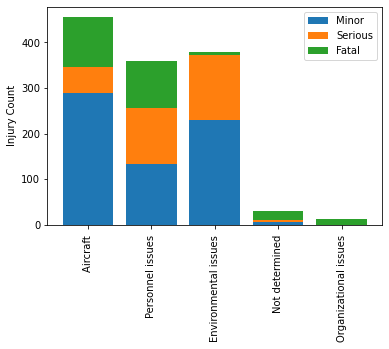

In [13]:
fig, ax = plt.subplots()
ax.bar(acc_inj['Accident Cause'], acc_inj['MinorInjuryTotal'], label = 'Minor')
ax.bar(acc_inj['Accident Cause'], acc_inj['SeriousInjuryTotal'], bottom = acc_inj['MinorInjuryTotal'], label = 'Serious')
ax.bar(acc_inj['Accident Cause'], acc_inj['FatalInjuryTotal'], bottom = acc_inj['MinorInjuryTotal'] + acc_inj['SeriousInjuryTotal'], label = 'Fatal')
ax.set_xticklabels(acc_inj['Accident Cause'], rotation = 90)
ax.set_ylabel('Injury Count')
ax.legend()
plt.show()

Again, it looks like aircraft issues, personnel isues and environmental issues are the main causes of accidents and cause the most injuries.

Not sure if it will show anything, but going to look at injuries over time. Has it gotten better since 2008?

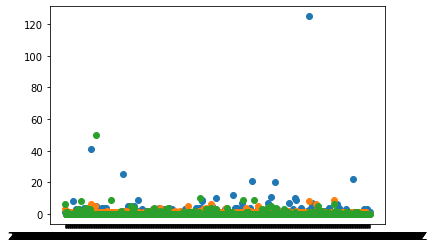

In [14]:
fig, ax = plt.subplots()
ax.scatter(df['EventDate'], df['MinorInjuryCount'])
ax.scatter(df['EventDate'], df['SeriousInjuryCount'])
ax.scatter(df['EventDate'], df['FatalInjuryCount'])
plt.show()

This looks pretty consistent across the years.

**Section2: Deeper into Causes**

We know aircraft, personnel and environment are the leading causes for aircraft accidents, but this doesn't tell us WHAT exactly caused them other than the general category. Going to dive deeper into the three main causes.

**_First: Aircraft_**

In [15]:
#create a DF with only aircraft as main finding
aircraft = df[df['Findings_main1'] == 'Aircraft ']
aircraft.shape

(214, 24)

In [16]:
#Want to see what type of details each layer of the findings hold, see if there is a certain level we want to ingestigate
print(aircraft.Findings_main2.unique())
print(aircraft.Findings_main2.value_counts().sum())

[' Aircraft structures ' ' Aircraft systems ' ' Fluids/misc hardware '
 ' Aircraft oper/perf/capability ' ' Aircraft power plant '
 ' Aircraft handling/service ' ' Aircraft propeller/rotor ']
214


In [17]:
print(aircraft.Findings_main3.unique())
print(aircraft.Findings_main3.value_counts().sum())

[' Doors ' ' Vacuum system ' ' Landing gear system ' ' Misc hardware '
 ' Performance/control parameters ' ' Power plant '
 ' Hydraulic power system ' ' Engine (reciprocating) '
 ' Turbocharging (recip only) ' ' Engine exhaust ' ' Engine controls '
 ' Towing and taxiing ' ' Fluids ' ' Aircraft capability '
 ' Navigation system ' ' Electrical power system ' ' Parking/securing '
 ' Equipment/furnishings ' ' Fuselage ' ' Engine (turbine/turboprop) '
 ' Airborne APU system ' ' Empennage structure ' ' (general) '
 ' Wing structure ' ' Air conditioning system ' ' Fuel system '
 ' Engine bleed air system ' ' Loading ' ' Engine fuel and control '
 ' Propeller system ']
214


In [18]:
print(aircraft.Findings_main4.unique())
print(aircraft.Findings_main4.value_counts().sum())

[' Cargo/baggage doors ' ' Vacuum indicating system '
 ' Gear position and warning ' ' Hoses and tubes '
 ' Gear extension and retract sys ' ' Main landing gear attach sec '
 ' Directional control ' ' Main gear strut/axle/truck ' ' (general) '
 ' Hydraulic' ' Recip engine power section ' ' Turbocharger '
 ' Angle of attack ' ' Surface speed/braking ' ' Climb rate '
 ' Nose/tail landing gear ' ' Tire casing ' ' Landing flare '
 ' Power lever ' ' Descent/approach/glide path ' ' Airspeed ' ' Towing '
 ' Fuel ' ' Taxiing ' ' Maximum weight ' ' Stall warning system '
 ' Altitude ' ' AC power distribution system ' ' Pitch control '
 ' Passenger compartment equip ' ' Plates/skins (aux fuselage) ' ' Oil '
 ' Reduction gear and shaft ' ' Parking/storage ' ' Tie'
 ' Land gear sys wiring ' ' Frames (main fuselage) ' ' Landing distance '
 ' Recip eng cyl section ' ' Descent rate ' ' Hydraulic fluid '
 ' Climb capability ' ' Master cylinder/brake valve '
 ' Electrical pwr sys wiring ' ' Spars/ribs 

In [19]:
print(aircraft.Findings_main5.unique())
print(aircraft.Findings_main5.value_counts().sum())

[' Incorrect service/maintenance' ' Malfunction' ' Not specified'
 ' Not attained/maintained' ' Failure' ' Not used/operated' nan
 ' Fatigue/wear/corrosion' ' Damaged/degraded' ' Incorrect use/operation'
 ' Capability exceeded' ' Fluid level' ' Attain/maintain not possible'
 'down/mooring ' ' Inoperative' ' Inadequate inspection'
 ' Related operating info' ' Fluid type' ' Fluid management'
 ' Not serviced/maintained' ' Not installed/available'
 ' Unknown/Not determined']
212


In [20]:
print(aircraft.Findings_main6.unique())
print(aircraft.Findings_main6.value_counts().sum())

[nan ' Incorrect use/operation']
1


Finding levels 2, 3 and 4 all seem to be aircraft part specific. Level 5 looks like the final reasons, being 'malfunction' or 'Inadequate inspection' which tells us what could be fixed to prevent the accident, which is what we are looking for. 

It does have two NaN values. Will delete those rows.

In [21]:
aircraft[aircraft['Findings_main5'].isna() == True]

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,MinorInjuryCount,ProbableCause,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6
31,MIA08LA149,ACC,68508,2008-06-01T12:50:00Z,Charlotte Amali,NaN,United States,N411FS,False,Aviation,...,0.0,The failure of maintenance personnel to identi...,135,"main system - Fatigue/wear/corrosion, Aircraf...",Aircraft,Aircraft systems,Hydraulic power system,Hydraulic,NaN,NaN
98,CEN09CA343,ACC,73982,2009-06-05T20:50:00Z,Englewood,Colorado,United States,N37127,False,Aviation,...,0.0,The failure of the landing gear to extend due ...,135,main system - Failure,Aircraft,Aircraft systems,Hydraulic power system,Hydraulic,NaN,NaN


In [22]:
aircraft = aircraft.drop(labels = [31,98], axis = 0)

In [23]:
#verify deletion
aircraft[aircraft['Findings_main5'].isna() == True]

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,MinorInjuryCount,ProbableCause,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6


In [24]:
#Want to see how the level 5 findings relate to injury counts. Going to be doing this for personnel and environmental too
#So making a function to call in those sections
def inj_df(df, col_name):
    #create a dataframe that has sum of each injury for each type in the column that is passed in
    totals = []
    acc_inj = pd.DataFrame(columns = ['Accident Cause', 'MI_Incidents', 'MinorInjuryTotal', 'SI_Incidents', 'SeriousInjuryTotal', 'FI_Incidents', 'FatalInjuryTotal', 'Total Incidents'])
    acc_causes = df[col_name].unique()
    for i in range(len(acc_causes)):
        temp = df[df[col_name] == acc_causes[i]]
        totals = [acc_causes[i], temp.MinorInjuryCount.loc[lambda x: x > 0].value_counts().sum(), temp.MinorInjuryCount.sum(), temp.SeriousInjuryCount.loc[lambda x: x > 0].value_counts().sum(), temp.SeriousInjuryCount.sum(), temp.FatalInjuryCount.loc[lambda x: x > 0].value_counts().sum(), temp.FatalInjuryCount.sum(), len(temp.index)]
        acc_inj.loc[len(acc_inj)] = totals

    #add new columns for total injuries and total incidents for each accident cause
    acc_inj['TotalInjuries'] = acc_inj['MinorInjuryTotal'] + acc_inj['SeriousInjuryTotal'] + acc_inj['FatalInjuryTotal']
    return acc_inj

In [25]:
aircraft_acc_inj = inj_df(aircraft, 'Findings_main5')
aircraft_acc_inj

,Accident Cause,MI_Incidents,MinorInjuryTotal,SI_Incidents,SeriousInjuryTotal,FI_Incidents,FatalInjuryTotal,Total Incidents,TotalInjuries
0,Incorrect service/maintenance,2,22.0,3,6.0,3,11.0,8,39.0
1,Malfunction,1,1.0,2,2.0,2,5.0,13,8.0
2,Not specified,0,0.0,0,0.0,0,0.0,5,0.0
3,Not attained/maintained,11,75.0,6,17.0,9,23.0,61,115.0
4,Failure,7,32.0,9,14.0,4,5.0,43,51.0
5,Not used/operated,1,3.0,0,0.0,1,2.0,5,5.0
6,Fatigue/wear/corrosion,5,133.0,2,9.0,2,5.0,14,147.0
7,Damaged/degraded,1,2.0,0,0.0,0,0.0,13,2.0
8,Incorrect use/operation,3,9.0,3,3.0,1,50.0,17,62.0
9,Capability exceeded,5,10.0,4,5.0,0,0.0,11,15.0


Injury count wise, 'Not attained/maintained' and 'Fatigue/wear/corrosion' account for the highest injuries. For total number of incidents, 'Not attained/maintained' and 'Failue' have the most.

**_Second: Personnel_**

In [26]:
#create a DF with only personnel as main finding
personnel = df[df['Findings_main1'] == 'Personnel issues ']
personnel.shape

(312, 24)

In [27]:
#Want to see what each layer of the findings hold, see if there is a certain level we want to investigate
print(personnel.Findings_main2.unique())
print(personnel.Findings_main2.value_counts().sum())

[' Psychological ' ' Action/decision ' ' Task performance '
 ' Miscellaneous ' ' Physical ' ' Experience/knowledge ']
312


In [28]:
print(personnel.Findings_main3.unique())
print(personnel.Findings_main3.value_counts().sum())

[' Attention/monitoring ' ' Perception/orientation/illusion ' ' Action '
 ' Info processing/decision ' ' Planning/preparation '
 ' Use of equip/info ' ' Communication (personnel) ' ' (general) '
 ' Inspection ' ' Maintenance ' ' Knowledge '
 ' Impairment/incapacitation ' ' Mental/emotional state '
 ' Sensory ability/limitation ' ' Training ']
312


In [29]:
print(personnel.Findings_main4.unique())
print(personnel.Findings_main4.value_counts().sum())

[' Attention ' ' Spatial disorientation ' ' Lack of action '
 ' Decision making/judgment ' ' Flight planning/navigation '
 ' Use of equip/system ' ' Fuel planning ' ' Lack of communication '
 ' CRM/MRM techniques ' ' (general) ' ' Aircraft control '
 ' Incorrect action performance ' ' Task monitoring/vigilance '
 ' Delayed action ' ' Monitoring environment ' ' Preflight inspection '
 ' Monitoring other aircraft ' ' Perception ' ' Repair '
 ' Incorrect action sequence ' ' Incorrect action selection '
 ' Forgotten action/omission ' ' Knowledge of procedures '
 ' Illness/injury ' ' Unnecessary action ' ' Use of policy/procedure '
 ' OTC medication ' ' Visual illusion/disorientation '
 ' Identification/recognition ' ' Issuing instructions '
 ' Scheduled/routine maintenance ' ' Monitoring other person '
 ' Monitoring equip/instruments ' ' Monitoring communications ' ' Stress '
 ' Other loss of consciousness ' ' Following instructions '
 ' Weather planning ' ' Use of checklist ' ' Visual fun

In [30]:
print(personnel.Findings_main5.unique())
print(personnel.Findings_main5.value_counts().sum())

[' Maintenance personnel' ' Pilot' ' Ground crew' ' Flight crew'
 ' Copilot' ' Cabin crew' ' Pilot of other aircraft' ' Not specified'
 ' Other' ' ATC personnel' ' Passenger' ' Airport personnel'
 ' Flight service personnel']
312


In [31]:
print(personnel.Findings_main6.unique())
print(personnel.Findings_main6.value_counts().sum())

[nan]
0


Findings_main4 would tell us what needs to be better trained, but Findings_main5 tells us WHO needs better training. So going to look at main5.

In [32]:
personnel_acc_inj = inj_df(personnel, 'Findings_main5')
personnel_acc_inj

,Accident Cause,MI_Incidents,MinorInjuryTotal,SI_Incidents,SeriousInjuryTotal,FI_Incidents,FatalInjuryTotal,Total Incidents,TotalInjuries
0,Maintenance personnel,1,5.0,1,1.0,0,0.0,7,6.0
1,Pilot,41,97.0,33,74.0,36,70.0,181,241.0
2,Ground crew,3,3.0,5,5.0,0,0.0,29,8.0
3,Flight crew,1,7.0,3,3.0,5,24.0,31,34.0
4,Copilot,0,0.0,0,0.0,0,0.0,8,0.0
5,Cabin crew,4,5.0,25,25.0,0,0.0,26,30.0
6,Pilot of other aircraft,1,1.0,1,1.0,0,0.0,9,2.0
7,Not specified,0,0.0,0,0.0,1,9.0,1,9.0
8,Other,2,4.0,2,2.0,1,1.0,5,7.0
9,ATC personnel,1,3.0,1,2.0,0,0.0,2,5.0


In [33]:
personnel_acc_inj.iloc[1,7] / personnel_acc_inj['Total Incidents'].sum()

0.5801282051282052

In [34]:
personnel_acc_inj.iloc[1,8] / personnel_acc_inj['TotalInjuries'].sum()

0.6713091922005571

This shows that the pilot is overwhelmingly the personnel who is responsible for the most incidents (almost 60%) and the most injuries (67%).

**_Third: Environmental_**

In [35]:
#create a DF with only environmental as main finding
enviro = df[df['Findings_main1'] == 'Environmental issues ']
enviro.shape

(206, 24)

In [36]:
#Want to see what each layer of the findings hold, see if there is a certain level we want to investigate
print(enviro.Findings_main2.unique())
print(enviro.Findings_main2.value_counts().sum())

[' Conditions/weather/phenomena ' ' Physical environment '
 ' Task environment ' ' Operating environment ']
206


In [37]:
print(enviro.Findings_main3.unique())
print(enviro.Findings_main3.value_counts().sum())

[' Light condition ' ' Runway/land/takeoff/taxi surface ' ' Turbulence '
 ' Object/animal/substance ' ' Physical workspace ' ' Wind '
 ' Ceiling/visibility/precip ' ' Terrain ' ' (general) '
 ' Convective weather ' ' Air traffic/operating proc '
 ' Communication system ' ' Temp/humidity/pressure '
 ' Airport facilities/design ']
206


In [38]:
print(enviro.Findings_main4.unique())
print(enviro.Findings_main4.value_counts().sum())

[' Dark ' ' Snow/slush/ice covered surface ' ' Clear air turbulence '
 ' Sign/marker ' ' (general) ' ' Flat light ' ' Ground vehicle '
 ' Animal(s)/bird(s) ' ' Variable wind ' ' Clouds '
 ' Convective turbulence ' ' Freezing rain/sleet ' ' Rough terrain '
 ' Thunderstorm ' ' Gusts ' ' Lightning ' ' Snow/ice ' ' Visibility '
 ' High wind ' ' Traffic congestion ' ' Terrain induced turbulence '
 ' Drizzle/mist ' ' Visual communication ' ' Snowy/icy terrain '
 ' Windshear ' ' Positioning/available space ' ' Person '
 ' Wake turbulence ' ' Conducive to carburetor icing '
 ' Taxiway lighting ' ' Conducive to structural icing ' ' Wet surface '
 ' Ground equipment ' ' Below VFR minima ' ' Hidden/submerged object '
 ' Access to equipment/controls ' ' Tailwind ']
206


In [39]:
print(enviro.Findings_main5.unique())
print(enviro.Findings_main5.value_counts().sum())

[' Not specified' ' Effect on personnel' ' Contributed to outcome'
 ' Effect on equipment' ' Response/compensation'
 ' Compliance w/ procedure' ' Effect on operation'
 ' Decision related to condition' ' Awareness of condition'
 ' Ability to respond/compensate']
206


In [40]:
print(enviro.Findings_main6.unique())
print(enviro.Findings_main6.value_counts().sum())

[nan]
0


Main 3 tells us the more general environmental condition that caused the incidents than main 4, while main 5 tells us how that impacted the outcome (such as effect on personnel vs effect on equipment). I think both main 3 and main 5 would be interesting to look at.

In [68]:
enviro_acc_inj3 = inj_df(enviro, 'Findings_main3')
enviro_acc_inj3

,Accident Cause,MI_Incidents,MinorInjuryTotal,SI_Incidents,SeriousInjuryTotal,FI_Incidents,FatalInjuryTotal,Total Incidents,TotalInjuries
0,Light condition,2,2.0,0,0.0,0,0.0,3,2.0
1,Runway/land/takeoff/taxi surface,3,6.0,0,0.0,0,0.0,12,6.0
2,Turbulence,51,192.0,119,126.0,0,0.0,121,318.0
3,Object/animal/substance,2,10.0,4,8.0,0,0.0,37,18.0
4,Physical workspace,0,0.0,3,3.0,0,0.0,5,3.0
5,Wind,2,6.0,1,1.0,1,1.0,9,8.0
6,Ceiling/visibility/precip,1,1.0,0,0.0,2,5.0,5,6.0
7,Terrain,0,0.0,0,0.0,0,0.0,2,0.0
8,(general),0,0.0,2,2.0,0,0.0,2,2.0
9,Convective weather,2,9.0,2,2.0,0,0.0,4,11.0


This tells us that turbulence is responsible for the largest number of incidents and injuries. 

In [42]:
enviro_acc_inj5 = inj_df(enviro, 'Findings_main5')
enviro_acc_inj5

,Accident Cause,MI_Incidents,MinorInjuryTotal,SI_Incidents,SeriousInjuryTotal,FI_Incidents,FatalInjuryTotal,Total Incidents,TotalInjuries
0,Not specified,5,7.0,6,7.0,0,0.0,12,14.0
1,Effect on personnel,41,174.0,105,110.0,1,3.0,109,287.0
2,Contributed to outcome,10,31.0,8,8.0,1,1.0,26,40.0
3,Effect on equipment,2,2.0,5,9.0,0,0.0,27,11.0
4,Response/compensation,0,0.0,0,0.0,0,0.0,1,0.0
5,Compliance w/ procedure,1,3.0,1,1.0,0,0.0,1,4.0
6,Effect on operation,3,5.0,5,5.0,1,2.0,19,12.0
7,Decision related to condition,1,1.0,0,0.0,0,0.0,4,1.0
8,Awareness of condition,1,4.0,2,3.0,0,0.0,2,7.0
9,Ability to respond/compensate,1,3.0,0,0.0,0,0.0,5,3.0


**Future Steps: (this note made before a mentor review, next steps were after conversations about it)**

I think I may have to do one-hot encoding. Since I have categorical data. Narrowing down to which level of finding is helpful for this, since I wouldn't need to do it for each one.

Thinking I'll need to do it like this:
1. Overall: one-hot encoding at the Findings_main1 level so verify that the three categories I picked out above are statistically the most probably causes.
2. Breaking down those three into sections and one-hot encoding the finding levels that I already looked into. Again to verify statistically. I would use the three data frames that I made with the broken down data (aircraft, personnel, enviro)

Note: For environmental, I would most likely look at both main 3 and 5, since both seem important and I don't want to cut out any data yet.

**Steps taken after mentor call**

I want to combine some of the categories in the Aircraft, Personnel and Environmental sections to make one hot encoding better with less categories. This new column will be used for secondary accident causes, such as pilot issue under Personnel. For the 'Not Specified'and 'Organizational Issues' from the 'Findings_main1' i am going to make them the same value, so 'Not specified' and 'organizational issue' so that they still have something in the secondary causes. 

Also going to divide States into Regions to be more manageable.

**Looking at locations**

Want to see how many unique states there are listed.

In [43]:
df.State.unique()

array(['Alaska', 'Michigan', 'California', 'Hawaii', 'Oklahoma',
       'North Carolina', 'Colorado', 'Iowa', 'Illinois', 'Kentucky',
       'District of Columbia', 'Georgia', 'Florida', 'Nevada', 'Oregon',
       'New Mexico', 'New York', 'Washington', 'Montana', 'Texas', 'Utah',
       nan, 'Massachusetts', 'Minnesota', 'Missouri', 'Arizona',
       'Wisconsin', 'South Carolina', 'Puerto Rico', 'Wyoming',
       'New Jersey', 'South Dakota', 'Maine', 'Indiana', 'West Virginia',
       'Virginia', 'Nebraska', 'Louisiana', 'Mississippi', 'Pennsylvania',
       'Ohio', 'Idaho', 'Vermont', 'Maryland', 'Kansas', 'Tennessee',
       'Alabama', 'Pacific Ocean', 'Atlantic Ocean', 'Other Foreign'],
      dtype=object)

In [44]:
df.Country.unique()

array(['United States', 'Cuba', 'Argentina', 'Denmark', 'American Samoa',
       'China', 'France', 'Unknown', 'Iceland', 'Bahamas', 'Bermuda',
       'Cayman Islands', 'Japan', 'Nicaragua'], dtype=object)

This dataset was supposed to just be accidents within the United States and its teritories, I would keep the extra data, but it doesn't fit with the rest of the project, so I'm deleting the rows with countries that are not the US.

In [45]:
df.Country.value_counts()

United States     736
Unknown             3
Argentina           2
China               2
Cuba                1
Denmark             1
American Samoa      1
France              1
Iceland             1
Bahamas             1
Bermuda             1
Cayman Islands      1
Japan               1
Nicaragua           1
Name: Country, dtype: int64

In [46]:
df.drop(df[df['Country'] != 'United States'].index, inplace = True)
df.Country.value_counts()

United States    736
Name: Country, dtype: int64

Now all data is within the US, its territories and international waters.

In [47]:
df[df['State'].isna() == True]

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,MinorInjuryCount,ProbableCause,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6
31,MIA08LA149,ACC,68508,2008-06-01T12:50:00Z,Charlotte Amali,NaN,United States,N411FS,False,Aviation,...,0.0,The failure of maintenance personnel to identi...,135,"main system - Fatigue/wear/corrosion, Aircraf...",Aircraft,Aircraft systems,Hydraulic power system,Hydraulic,NaN,NaN
117,ERA09LA529,ACC,74777,2009-08-29T04:00:00Z,Unknown,NaN,United States,N367PH,False,Aviation,...,0.0,Undetermined.,121,NaN,Not determined,Not determined,(general),(general),Unknown/Not determined,NaN
164,DCA10FA076,ACC,76666,2010-07-15T02:00:00Z,Pacific Ocean,NaN,United States,N184DN,False,Aviation,...,0.0,an inadvertent encounter with clear air turbul...,121,NaN,Environmental issues,Conditions/weather/phenomena,Turbulence,Clear air turbulence,Effect on personnel,NaN
184,ERA11LA100,ACC,78074,2010-12-13T13:30:00Z,St. Thomas,NaN,United States,N1348L,False,Aviation,...,0.0,The pilot's failure to maintain an adequate vi...,135,NaN,Personnel issues,Psychological,Attention/monitoring,Monitoring environment,Pilot,NaN
207,WPR11LA203,ACC,78892,2011-04-11T07:00:00Z,Pacific Ocean,NaN,United States,N766AN,False,Aviation,...,2.0,An inadvertent encounter with convective-induc...,121,NaN,Environmental issues,Conditions/weather/phenomena,Turbulence,Convective turbulence,Effect on personnel,NaN
303,WPR13LA045,ACC,85625,2012-11-18T21:18:00Z,Obyan,NaN,United States,N4267R,False,Aviation,...,1.0,A partialÂ loss of engine power shortly after ...,135,Personnel issues - Task performance - Use of ...,Not determined,Not determined,(general),(general),Unknown/Not determined,NaN
349,WPR14LA007,ACC,88176,2013-10-06T04:00:00Z,Tinian Island,NaN,United States,N4089W,False,Aviation,...,0.0,The pilotâ€™s failure to maintain terrain clea...,135,Personnel issues - Action/decision - Action -...,Aircraft,Aircraft oper/perf/capability,Performance/control parameters,Altitude,Not attained/maintained,NaN
572,GAA17CA570,ACC,96145,2017-08-30T04:00:00Z,Saipan,NaN,United States,N4078J,False,Aviation,...,0.0,Impact with multiple birds while retracting th...,135,Aircraft - Aircraft systems - Hydraulic power...,Environmental issues,Physical environment,Object/animal/substance,Animal(s)/bird(s),Effect on equipment,NaN
663,GAA19CA268,ACC,99437,2019-04-19T04:00:00Z,Saipan,NaN,United States,N4599X,False,Aviation,...,0.0,The airplaneâ€™s collision with a bird during ...,135,Environmental issues - Physical environment -...,Environmental issues,Physical environment,Object/animal/substance,Animal(s)/bird(s),Effect on operation,NaN


Charlotte Amali and St. Thomas are in the Caribbean. Obyan, Tinian Island and Saipan are all in the Pacific. So I'm going to code their 'State' to those more general locations, first by filling 'State' column with current 'City' value, then replaceing them.

In [48]:
df['State'].fillna(df['City'], inplace = True)
df[df['State'].isna() == True]

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,MinorInjuryCount,ProbableCause,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6


In [49]:
#replaceing values
#also replacing Puerto Rico with 'Caribbean'
df['State'] = df['State'].replace('Charlotte Amali', 'Caribbean')
df['State'] = df['State'].replace('St. Thomas', 'Caribbean')
df['State'] = df['State'].replace('Puerto Rico', 'Caribbean')
df['State'] = df['State'].replace('Obyan', 'Pacific Ocean')
df['State'] = df['State'].replace('Tinian Island', 'Pacific Ocean')
df['State'] = df['State'].replace('Saipan', 'Pacific Ocean')

In [57]:
state_acc_inj = inj_df(df, 'State')
state_acc_inj.rename(columns = {'Accident Cause':'State'}, inplace = True)
state_acc_inj

,State,MI_Incidents,MinorInjuryTotal,SI_Incidents,SeriousInjuryTotal,FI_Incidents,FatalInjuryTotal,Total Incidents,TotalInjuries
0,Alaska,47,146.0,31,72.0,28,77.0,205,295.0
1,Michigan,2,4.0,1,1.0,2,3.0,13,8.0
2,California,3,4.0,15,15.0,1,4.0,40,23.0
3,Hawaii,3,8.0,3,7.0,4,8.0,11,23.0
4,Oklahoma,1,1.0,1,1.0,1,1.0,4,3.0
5,North Carolina,6,29.0,10,10.0,2,6.0,21,45.0
6,Colorado,5,48.0,8,14.0,0,0.0,19,62.0
7,Iowa,1,5.0,3,3.0,0,0.0,5,8.0
8,Illinois,6,27.0,10,10.0,2,4.0,26,41.0
9,Kentucky,1,1.0,2,2.0,1,2.0,4,5.0


49 categories is a lot, so want to change from states to the 5 geographical regions of the United States. Will leave Caribbean and Pacific Ocean as they are, so I added them to the bottom of the csv file with the state's regions.

In [61]:
colnames = ['State', 'Region']
regions_df = pd.read_csv('data_raw/State_Regions.csv', names = colnames)
regions_df.head()

,State,Region
0,Alabama,Southeast
1,Alaska,Pacific West
2,Arizona,Pacific West
3,Arkansas,Southeast
4,California,Pacific West


In [64]:
#now to merge the regions list with the original dataframe to ahev a new column 'Region'
df_new = df.merge(regions_df, on = ['State'])
df_new

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,ProbableCause,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6,Region
0,ANC08MA038,ACC,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,Aviation,...,The failure of company maintenance personnel t...,135,Personnel issues - Task performance - Mainten...,Aircraft,Aircraft structures,Doors,Cargo/baggage doors,Incorrect service/maintenance,NaN,Pacific West
1,ANC08LA031,ACC,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,Aviation,...,The pilot's selection of unsuitable terrain fo...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,NaN,Pacific West
2,ANC08LA046,ACC,67751,2008-04-01T14:40:00Z,Koliganek,Alaska,United States,N8327S,False,Aviation,...,The pilot's VFR flight into adverse weather co...,135,Environmental issues - Physical environment -...,Environmental issues,Conditions/weather/phenomena,Light condition,Flat light,Effect on personnel,NaN,Pacific West
3,ANC08FA050,ACC,67801,2008-04-09T15:30:00Z,Unalaska,Alaska,United States,N741,False,Aviation,...,The pilot's failure to maintain clearance from...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Object/animal/substance,Ground vehicle,Contributed to outcome,NaN,Pacific West
4,ANC08CA065,ACC,68340,2008-04-28T13:30:00Z,Talkeetna,Alaska,United States,N565TA,False,Aviation,...,The pilot's selection of an unsuitable landing...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,NaN,Pacific West
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,DCA19CA005,ACC,98459,2018-10-09T22:00:00Z,Nashville,Tennessee,United States,N287WN,False,Aviation,...,flight attendant tripping over a passenger's k...,121,NaN,Personnel issues,Task performance,(general),(general),Cabin crew,NaN,Southeast
732,DCA19CA091,ACC,99058,2019-02-17T18:04:00Z,Franklin,Tennessee,United States,N3730B,False,Aviation,...,an encounter with convective turbulence during...,121,NaN,Environmental issues,Conditions/weather/phenomena,Turbulence,Convective turbulence,Effect on personnel,NaN,Southeast
733,DCA19CA130,ACC,99199,2019-03-27T18:25:00Z,Nashville,Tennessee,United States,N249WN,False,Aviation,...,a collision with a bird.,121,NaN,Environmental issues,Physical environment,Object/animal/substance,Animal(s)/bird(s),Effect on equipment,NaN,Southeast
734,ERA14FA120,ACC,88799,2014-02-14T22:21:00Z,Clay,Alabama,United States,N732EJ,False,Aviation,...,The pilot's failure to maintain control of the...,135,Personnel issues - Action/decision - Action -...,Aircraft,Aircraft oper/perf/capability,Performance/control parameters,Lateral/bank control,Not attained/maintained,NaN,Southeast


In [66]:
#Now if I look at accidents and injuries per region, it should be more manageable than 49 categories
region_acc_inj = inj_df(df_new, 'Region')
region_acc_inj.rename(columns = {'Accident Cause':'Region'}, inplace = True)
region_acc_inj

,Region,MI_Incidents,MinorInjuryTotal,SI_Incidents,SeriousInjuryTotal,FI_Incidents,FatalInjuryTotal,Total Incidents,TotalInjuries
0,Pacific West,60,176.0,62,110.0,38,100.0,319,386.0
1,Midwest,16,56.0,32,32.0,8,29.0,95,117.0
2,Plains,22,94.0,35,43.0,10,22.0,95,159.0
3,Southeast,25,107.0,53,58.0,8,19.0,104,184.0
4,Northeast,20,172.0,35,47.0,9,69.0,99,288.0
5,Caribbean,5,8.0,3,4.0,4,7.0,13,19.0
6,Other,0,0.0,1,1.0,0,0.0,2,1.0
7,Pacific,3,7.0,7,15.0,2,4.0,9,26.0


The 8 categories is much more manageable than the 49 from above.

**Combining Accident Causes**

In [84]:
#making a function that will categorize new values for secondary cause of accidents
#in the next part of the Capstone project, I will use findings_main1 and the new column to one-hot encode
def secondary_cause(row):
    index = row.name
     
    if df_new.iloc[index, 18] == 'Not determined ':
        return 'Not Determined'
    elif df_new.iloc[index, 18] == 'Organizational issues ':
        return 'Org Issues'
    elif df_new.iloc[index, 18] == 'Aircraft ':
        if (df_new.iloc[index, 22] == ' Incorrect service/maintenance') \
            or (df_new.iloc[index, 22] == ' Not attained/maintained')\
            or (df_new.iloc[index, 22] == ' Not serviced/maintained'):
            return 'Maintenance Issue'
        elif (df_new.iloc[index, 22] == ' Malfunction') or (df_new.iloc[index, 22] == ' Failure'):
            return 'Failure'
        elif (df_new.iloc[index, 22] == ' Fatigue/wear/corrosion') or (df_new.iloc[index, 22] == ' Damaged/degraded'):
            return 'Damaged Part'
        elif (df_new.iloc[index, 22] == ' Incorrect use/operation'):
            return 'Incorrect use/operation'
        elif (df_new.iloc[index, 22] == ' Capability exceeded'):
            return 'Capability exceeded'
        elif (df_new.iloc[index, 22] == ' Fluid level') \
            or (df_new.iloc[index, 22] == ' Fluid type') \
            or (df_new.iloc[index, 22] == ' Fluid management'):
            return 'Fluids'
        else:
            return 'Air_Other'
    elif df_new.iloc[index, 18] == 'Personnel issues ':
        if (df_new.iloc[index, 22] == ' Pilot') \
            or (df_new.iloc[index, 22] == ' Copilot') \
            or (df_new.iloc[index, 22] == ' Pilot of other aircraft'):
            return 'Pilot'
        elif (df_new.iloc[index, 22] == ' Ground crew'):
            return 'Ground Crew'
        elif (df_new.iloc[index, 22] == ' Flight crew') or (df_new.iloc[index, 22] == ' Cabin crew'):
            return 'Crew'
        elif (df_new.iloc[index, 22] == ' Passenger'):
            return 'Passenger'
        elif (df_new.iloc[index, 22] == ' Not specified') or (df_new.iloc[index, 22] == ' Other'):
            return 'Per_Other'
        else: 
            return 'Airport/Airline Personnel'
    elif df_new.iloc[index, 18] == 'Environmental issues ':
        if (df_new.iloc[index, 20] == ' Light condition ') or (df_new.iloc[index, 20] == ' Ceiling/visibility/precip '):
            return 'Lighting/Visibility'
        elif (df_new.iloc[index, 20] == ' Runway/land/takeoff/taxi surface '):
            return 'Runway'
        elif (df_new.iloc[index, 20] == ' Turbulence '):
            return 'Turbulence'
        elif (df_new.iloc[index, 20] == ' Object/animal/substance '):
            return 'Object/Animal'
        elif (df_new.iloc[index, 20] == ' Physical workspace ') or (df_new.iloc[index, 20] == ' Communication system '):
            return 'Equipment'
        elif (df_new.iloc[index, 20] == ' Wind ') \
            or (df_new.iloc[index, 20] == ' Convective weather ') \
            or (df_new.iloc[index, 20] == ' Temp/humidity/pressure '):
            return 'Wind/Weather'
        else:
            return 'Env_Other'

In [85]:
df_new['NewCol'] = df_new.apply(secondary_cause, axis = 1)

In [86]:
df_new

,NtsbNo,EventType,Mkey,EventDate,City,State,Country,N#,HasSafetyRec,Mode,...,FAR Part,Findings_supp,Findings_main1,Findings_main2,Findings_main3,Findings_main4,Findings_main5,Findings_main6,Region,NewCol
0,ANC08MA038,ACC,67341,2008-01-05T13:43:00Z,Kodiak,Alaska,United States,N509FN,False,Aviation,...,135,Personnel issues - Task performance - Mainten...,Aircraft,Aircraft structures,Doors,Cargo/baggage doors,Incorrect service/maintenance,NaN,Pacific West,Maintenance Issue
1,ANC08LA031,ACC,67395,2008-01-15T14:39:00Z,Bethel,Alaska,United States,N454SF,False,Aviation,...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,NaN,Pacific West,Runway
2,ANC08LA046,ACC,67751,2008-04-01T14:40:00Z,Koliganek,Alaska,United States,N8327S,False,Aviation,...,135,Environmental issues - Physical environment -...,Environmental issues,Conditions/weather/phenomena,Light condition,Flat light,Effect on personnel,NaN,Pacific West,Lighting/Visibility
3,ANC08FA050,ACC,67801,2008-04-09T15:30:00Z,Unalaska,Alaska,United States,N741,False,Aviation,...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Object/animal/substance,Ground vehicle,Contributed to outcome,NaN,Pacific West,Object/Animal
4,ANC08CA065,ACC,68340,2008-04-28T13:30:00Z,Talkeetna,Alaska,United States,N565TA,False,Aviation,...,135,Personnel issues - Action/decision - Info pro...,Environmental issues,Physical environment,Runway/land/takeoff/taxi surface,Snow/slush/ice covered surface,Not specified,NaN,Pacific West,Runway
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731,DCA19CA005,ACC,98459,2018-10-09T22:00:00Z,Nashville,Tennessee,United States,N287WN,False,Aviation,...,121,NaN,Personnel issues,Task performance,(general),(general),Cabin crew,NaN,Southeast,Crew
732,DCA19CA091,ACC,99058,2019-02-17T18:04:00Z,Franklin,Tennessee,United States,N3730B,False,Aviation,...,121,NaN,Environmental issues,Conditions/weather/phenomena,Turbulence,Convective turbulence,Effect on personnel,NaN,Southeast,Turbulence
733,DCA19CA130,ACC,99199,2019-03-27T18:25:00Z,Nashville,Tennessee,United States,N249WN,False,Aviation,...,121,NaN,Environmental issues,Physical environment,Object/animal/substance,Animal(s)/bird(s),Effect on equipment,NaN,Southeast,Object/Animal
734,ERA14FA120,ACC,88799,2014-02-14T22:21:00Z,Clay,Alabama,United States,N732EJ,False,Aviation,...,135,Personnel issues - Action/decision - Action -...,Aircraft,Aircraft oper/perf/capability,Performance/control parameters,Lateral/bank control,Not attained/maintained,NaN,Southeast,Maintenance Issue


There should be 7 new categories for Aircraft, 6 for personnel, 7 for Environmental plus the 'Not Determined' and 'Organizational Issues' categories, which is 22 total.

In [90]:
len(df_new.NewCol.unique())

22

Success!

In [91]:
new_acc_inj = inj_df(df_new, 'NewCol')
new_acc_inj

,Accident Cause,MI_Incidents,MinorInjuryTotal,SI_Incidents,SeriousInjuryTotal,FI_Incidents,FatalInjuryTotal,Total Incidents,TotalInjuries
0,Maintenance Issue,13,97.0,9,23.0,12,34.0,70,154.0
1,Runway,3,6.0,0,0.0,0,0.0,12,6.0
2,Lighting/Visibility,3,3.0,0,0.0,2,5.0,8,8.0
3,Object/Animal,2,10.0,4,8.0,0,0.0,37,18.0
4,Failure,8,33.0,10,15.0,5,9.0,55,57.0
5,Incorrect use/operation,3,9.0,3,3.0,1,50.0,17,62.0
6,Pilot,42,98.0,34,75.0,36,70.0,198,243.0
7,Wind/Weather,6,19.0,4,4.0,1,1.0,16,24.0
8,Capability exceeded,5,10.0,3,4.0,0,0.0,10,14.0
9,Crew,4,11.0,27,27.0,5,24.0,56,62.0


**Final Step**

Saving the new DataFrame to an excel sheet for further use

In [92]:
df_new.to_excel('data/flights_EDA.xlsx', index = False)